In [8]:
%autosave 60

Autosaving every 60 seconds


In [9]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [3]:
from qiskit.quantum_info import entropy, DensityMatrix

In [4]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_2312\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-05-25 07:12:43,716: Credentials are already in use. The existing account in the session will be replaced.


ibm_peekskill                ibm_perth                    ibm_nairobi
-------------                ---------                    -----------
Num. Qubits:  27             Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 2              Pending Jobs: 77             Pending Jobs: 188
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      381.9          Avg. T1:      152.8          Avg. T1:      117.3
Avg. T2:      309.0          Avg. T2:      131.6          Avg. T2:      74.2



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 165            Pending Jobs: 23             Pending Jobs: 70
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [5]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
%run init-qiskit_optical_elements.ipynb

In [24]:
device = provider.get_backend('ibm_nairobi')

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{in}$

In [19]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
Irr_b_in                 = np.zeros(th.shape[0], dtype=object)
x = []; jobs_ids_b_in = []

<img src = 'setup_realism.jpg' width = '90%'>

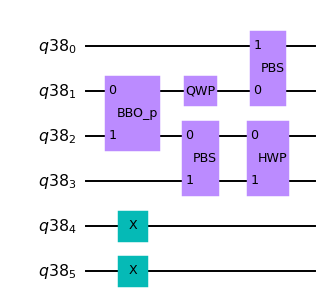

In [22]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

In [27]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
try:
    try:
        for k in range(0, 10):
            j=10
            print('k = {:2d}  - theta = {}'.format(k, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuito
            #
            qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            job_monitor(job)
            print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
            print(job.job_id())
            x.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            print('k = {:2d}  - theta = {}'.format(k, th[j]))
    except:
        l=k
        for k in range(l, 10):
            j=10
            print('\nk = {:2d}  - theta = {}'.format(k, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuito
            #
            qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            job_monitor(job)
            print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
            print(job.job_id())
            x.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            print('k = {:2d}  - theta = {}'.format(k, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-25 - 07:30:56

k =  0  - theta = 1.5757963267948967
Job Status: job has successfully run
chnjhptaqbbvbu6qo6pg
k =  0  - theta = 1.5757963267948967
k =  1  - theta = 1.5757963267948967
Job Status: job has successfully run
chnm5htaqbbvbu6sdgbg
k =  1  - theta = 1.5757963267948967
k =  2  - theta = 1.5757963267948967
Job Status: job is queued (None)
k =  2  - theta = 1.5757963267948967


Erro detectado:  

2023-05-25 - 13:28:32



In [28]:
print(x)

['chnjhptaqbbvbu6qo6pg', 'chnm5htaqbbvbu6sdgbg']


In [29]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
try:
    try:
        for k in range(2, 10):
            j=10
            print('k = {:2d}  - theta = {}'.format(k, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuito
            #
            qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            job_monitor(job)
            print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
            print(job.job_id())
            x.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            print('k = {:2d}  - theta = {}'.format(k, th[j]))
    except:
        l=k
        for k in range(l, 10):
            j=10
            print('\nk = {:2d}  - theta = {}'.format(k, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuito
            #
            qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            job_monitor(job)
            print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
            print(job.job_id())
            x.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            print('k = {:2d}  - theta = {}'.format(k, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-25 - 13:29:44

k =  2  - theta = 1.5757963267948967
Job Status: job has successfully run
2023-05-25 - 13:47:50
chnopv0uhh1ldcoctor0
k =  2  - theta = 1.5757963267948967
k =  3  - theta = 1.5757963267948967
Job Status: job has successfully run
2023-05-25 - 13:55:45
chnp2eguhh1ldcod2s7g
k =  3  - theta = 1.5757963267948967
k =  4  - theta = 1.5757963267948967
Job Status: job has successfully run
2023-05-25 - 14:03:24
chnp65cpd6rr9ji3ln10
k =  4  - theta = 1.5757963267948967
k =  5  - theta = 1.5757963267948967
Job Status: job has successfully run
2023-05-25 - 14:10:42
chnp9o5aqbbvbu6u7g4g
k =  5  - theta = 1.5757963267948967
k =  6  - theta = 1.5757963267948967
Job Status: job has successfully run
2023-05-25 - 14:15:12
chnpd5k2b9sdqn1q4ja0
k =  6  - theta = 1.5757963267948967
k =  7  - theta = 1.5757963267948967
Job Status: job has successfully run
2023-05-25 - 14:19:22
chnpf942b9sdqn1q5ucg
k =  7  - theta = 1.5757963267948967
k =  8  - theta = 1.5757963267948967
Job

In [31]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 3512.04 segundos
Tempo de execução: 58.53 minutos
Tempo de execução: 0.98 horas
Tempo de execução por job: 0.1 horas 


In [42]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g']]

In [34]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=9
print('\nj = {:2d}  - theta = {}\n'.format(j, th[j]))
x = []
try:
    try:
        for k in range(0, 10):
            print('k = {:2d}'.format(k))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuito
            #
            qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            job_monitor(job)
            print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
            print(job.job_id())
            x.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            print('k = {:2d}'.format(k))
    except:
        l=k
        for k in range(l, 10):
            print('\nk = {:2d}'.format(k))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuito
            #
            qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            job_monitor(job)
            print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
            print(job.job_id())
            x.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-25 - 14:33:39


j =  9  - theta = 1.419216694115407

k =  0
Job Status: job has successfully run
2023-05-25 - 14:44:54
chnpntk2b9sdqn1qb9a0
k =  0
k =  1
Job Status: job has successfully run
2023-05-25 - 14:49:07
chnpt6k2b9sdqn1qejo0
k =  1
k =  2
Job Status: job has successfully run
2023-05-25 - 14:53:15
chnpv5v8rmtc64q4kk60
k =  2
k =  3
Job Status: job has successfully run
2023-05-25 - 14:59:43
chnq13qnajhpa63uf620
k =  3
k =  4
Job Status: job has successfully run
2023-05-25 - 15:05:28
chnq44qnajhpa63ugsc0
k =  4
k =  5
Job Status: job has successfully run
2023-05-25 - 15:12:18
chnq6r5aqbbvbu6up5mg
k =  5
k =  6
Job Status: job has successfully run
2023-05-25 - 15:19:42
chnqa1guhh1ldcodqfk0
k =  6
k =  7
Job Status: job has successfully run
2023-05-25 - 15:27:06
chnqdglaqbbvbu6usteg
k =  7
k =  8
Job Status: job has successfully run
2023-05-25 - 15:34:06
chnqgvkpd6rr9ji4fjqg
k =  8
k =  9
Job Status: job has successfully run
2023-05-25 - 15:41:38
chnqk8guhh1ldc

In [35]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 4081.71 segundos
Tempo de execução: 68.03 minutos
Tempo de execução: 1.13 horas
Tempo de execução por job: 0.13 horas 


In [46]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90']]

In [47]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=8
print('\nj = {:2d}  - theta = {}\n'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]-0.003); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-25 - 15:55:21


j =  8  - theta = 1.2626370614359173


k =  0
Job Status: job has successfully run
2023-05-25 - 16:01:48
chnqu7anajhpa63v07vg
k =  0


k =  1
Job Status: job has successfully run
2023-05-25 - 16:10:59
chnr1878rmtc64q58ufg
k =  1


k =  2
Job Status: job has successfully run
2023-05-25 - 16:18:45
chnr5i0uhh1ldcoearf0
k =  2


k =  3
Job Status: job has successfully run
2023-05-25 - 16:26:33
chnr96f8rmtc64q5du00
k =  3


k =  4
Job Status: job has successfully run
2023-05-25 - 16:35:02
chnrcrf8rmtc64q5gbh0
k =  4


k =  5
Job Status: job has successfully run
2023-05-25 - 16:42:47
chnrgqtaqbbvbu6vijpg
k =  5


k =  6
Job Status: job has successfully run
2023-05-25 - 16:51:09
chnrkespd6rr9ji55hag
k =  6


k =  7
Job Status: job has successfully run
2023-05-25 - 16:59:16
chnrocf8rmtc64q5n27g
k =  7


k =  8
Job Status: job has successfully run
2023-05-25 - 17:07:23
chnrs62najhpa63vi69g
k =  8


k =  9
Job Status: job has successfully run
2023-05-25 - 17:

In [48]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 4843.04 segundos
Tempo de execução: 80.72 minutos
Tempo de execução: 1.35 horas
Tempo de execução por job: 0.17 horas 


In [49]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g']]

In [50]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=7
print('\nj = {:2d}  - theta = {}\n'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-25 - 17:17:06


j =  7  - theta = 1.1060574287564275


k =  0
Job Status: job has successfully run
2023-05-25 - 17:24:09
chns4hlaqbbvbu6vtmog
k =  0

k =  1
Job Status: job has successfully run
2023-05-25 - 17:32:41
chns7rdaqbbvbu6vvetg
k =  1

k =  2
Job Status: job has successfully run
2023-05-25 - 17:40:48
chnsbr8uhh1ldcof0nc0
k =  2

k =  3
Job Status: job has successfully run
2023-05-25 - 17:48:44
chnsfl2najhpa63vsefg
k =  3

k =  4
Job Status: job has successfully run
2023-05-25 - 17:56:55
chnsjhinajhpa63vubkg
k =  4

k =  5
Job Status: job has successfully run
2023-05-25 - 18:05:28
chnsn7kpd6rr9ji5o0q0
k =  5

k =  6
Job Status: job has successfully run
2023-05-25 - 18:13:28
chnsr778rmtc64q69n20
k =  6

k =  7
Job Status: job has successfully run
2023-05-25 - 18:24:18
chnsuv8uhh1ldcofa72g
k =  7

k =  8
Job Status: job has successfully run
2023-05-25 - 18:33:28
chnt41kpd6rr9ji5urp0
k =  8

k =  9
Job Status: job has successfully run
2023-05-25 - 18:38:51
chn

In [51]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 4907.5 segundos
Tempo de execução: 81.79 minutos
Tempo de execução: 1.36 horas
Tempo de execução por job: 0.19 horas 


In [52]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [53]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=8
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-25 - 18:38:56


j =  8  - theta = 1.2626370614359173

k =  0
Job Status: job has successfully run
2023-05-25 - 18:46:49
chntasspd6rr9ji62cug
k =  0

k =  1
Job Status: job has successfully run
2023-05-25 - 18:55:35
chntejcpd6rr9ji64as0
k =  1

k =  2
Job Status: job has successfully run
2023-05-25 - 19:03:41
chntimv8rmtc64q6lv20
k =  2

k =  3
Job Status: job has successfully run
2023-05-26 - 04:12:52
chntmgdaqbbvbu70mrqg
k =  3

k =  4
Job Status: job incurred error     
2023-05-26 - 08:05:55
cho5nuf8rmtc64qb4af0


Erro detectado:  "Unable to retrieve result for job cho5nuf8rmtc64qb4af0: 'results'"

2023-05-26 - 08:05:59



In [54]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 48421.74 segundos
Tempo de execução: 807.03 minutos
Tempo de execução: 13.45 horas
Tempo de execução por job: 1.68 horas 


In [55]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [58]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=8
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
#x = []
try:
    for k in range(4, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-26 - 08:27:30


j =  8  - theta = 1.2626370614359173

k =  4
Job Status: job has successfully run
2023-05-26 - 09:20:34
cho9f9taqbbvbu77trf0
k =  4

k =  5
Job Status: job has successfully run
2023-05-26 - 09:24:35
choa862najhpa648898g
k =  5

k =  6
Job Status: job has successfully run
2023-05-26 - 09:28:34
choaa242b9sdqn245irg
k =  6

k =  7
Job Status: job has successfully run
2023-05-26 - 09:32:32
choabtlaqbbvbu78gel0
k =  7

k =  8
Job Status: job has successfully run
2023-05-26 - 09:36:30
choadp42b9sdqn2484kg
k =  8

k =  9
Job Status: job has successfully run
2023-05-26 - 09:40:32
choafkspd6rr9jie4he0
k =  9

2023-05-26 - 09:40:36



In [59]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 4384.11 segundos
Tempo de execução: 73.07 minutos
Tempo de execução: 1.22 horas
Tempo de execução por job: 0.15 horas 


In [60]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [64]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=7
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-26 - 09:42:34


j =  7  - theta = 1.1060574287564275

k =  0
Job Status: job has successfully run
2023-05-26 - 09:49:56
choaifcpd6rr9jie6gqg
k =  0

k =  1
Job Status: job has successfully run
2023-05-26 - 09:54:05
choalvouhh1ldconn180
k =  1

k =  2
Job Status: job has successfully run
2023-05-26 - 09:58:28
choans8uhh1ldcono800
k =  2

k =  3
Job Status: job has successfully run
2023-05-26 - 10:22:23
choapu78rmtc64qevb80
k =  3

k =  4
Job Status: job has successfully run
2023-05-26 - 10:26:40
chob55n8rmtc64qf7jug
k =  4

k =  5
Job Status: job has successfully run
2023-05-26 - 10:30:38
chob754pd6rr9jiekv90
k =  5

k =  6
Job Status: job has successfully run
2023-05-26 - 10:34:54
chob90spd6rr9jiemau0
k =  6

k =  7
Job Status: job has successfully run
2023-05-26 - 10:38:58
chobb0v8rmtc64qfbrog
k =  7

k =  8
Job Status: job has successfully run
2023-05-26 - 10:43:05
chobctlaqbbvbu797h70
k =  8

k =  9
Job Status: job has successfully run
2023-05-26 - 10:47:06
chob

In [65]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 3874.43 segundos
Tempo de execução: 64.57 minutos
Tempo de execução: 1.08 horas
Tempo de execução por job: 0.15 horas 


In [66]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [67]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=6
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-26 - 10:47:38


j =  6  - theta = 0.9494777960769379

k =  0
Job Status: job has successfully run
2023-05-26 - 10:51:33
chobgv8uhh1ldcooagh0
k =  0

k =  1
Job Status: job has successfully run
2023-05-26 - 10:55:35
chobiqdaqbbvbu79bukg
k =  1

k =  2
Job Status: job has successfully run
2023-05-26 - 10:59:30
chobkmspd6rr9jieuro0
k =  2

k =  3
Job Status: job has successfully run
2023-05-26 - 11:03:33
chobmhk2b9sdqn254fl0
k =  3

k =  4
Job Status: job has successfully run
2023-05-26 - 11:07:31
choboekpd6rr9jif1f7g
k =  4

k =  5
Job Status: job has successfully run
2023-05-26 - 11:11:39
chobq9spd6rr9jif2m4g
k =  5

k =  6
Job Status: job has successfully run
2023-05-26 - 11:15:47
chobs9laqbbvbu79ieh0
k =  6

k =  7
Job Status: job has successfully run
2023-05-26 - 11:19:45
chobu5s2b9sdqn259e30
k =  7

k =  8
Job Status: job has successfully run
2023-05-26 - 11:23:45
choc01f8rmtc64qfqtu0
k =  8

k =  9
Job Status: job has successfully run
2023-05-26 - 11:27:51
choc

In [68]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 2416.27 segundos
Tempo de execução: 40.27 minutos
Tempo de execução: 0.67 horas
Tempo de execução por job: 0.11 horas 


In [69]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [70]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=5
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-26 - 11:28:55


j =  5  - theta = 0.7928981633974483

k =  0
Job Status: job has successfully run
2023-05-26 - 11:33:53
choc4aspd6rr9jif9edg
k =  0

k =  1
Job Status: job has successfully run
2023-05-26 - 11:37:58
choc6mn8rmtc64qfvis0
k =  1

k =  2
Job Status: job has successfully run
2023-05-26 - 11:43:47
choc8iguhh1ldcooqj50
k =  2

k =  3
Job Status: job has successfully run
2023-05-26 - 11:47:53
chocba5aqbbvbu79sjjg
k =  3

k =  4
Job Status: job has successfully run
2023-05-26 - 11:52:31
chocddqnajhpa649ocq0
k =  4

k =  5
Job Status: job has successfully run
2023-05-26 - 11:56:39
chocfcqnajhpa649pq80
k =  5

k =  6
Job Status: job has successfully run
2023-05-26 - 12:00:56
chochataqbbvbu7a0st0
k =  6

k =  7
Job Status: job has successfully run
2023-05-26 - 12:05:34
chocjgk2b9sdqn25o1a0
k =  7

k =  8
Job Status: job has successfully run
2023-05-26 - 12:09:41
choclgn8rmtc64qgad5g
k =  8

k =  9
Job Status: job has successfully run
2023-05-26 - 12:13:57
choc

In [71]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 2704.73 segundos
Tempo de execução: 45.08 minutos
Tempo de execução: 0.75 horas
Tempo de execução por job: 0.15 horas 


In [72]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [73]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=4
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-26 - 12:17:37


j =  4  - theta = 0.6363185307179586

k =  0
Job Status: job has successfully run
2023-05-26 - 18:08:58
chocr7anajhpa64a3qn0
k =  0

k =  1
Job Status: job has successfully run
2023-05-26 - 19:37:13
chohvrqnajhpa64ecr40
k =  1

k =  2
Job Status: job has successfully run
2023-05-26 - 21:28:20
choj97kpd6rr9jil2vi0
k =  2

k =  3
Job Status: job is queued (None)

Job Status: job has successfully run
2023-05-27 - 00:59:00
choktac2b9sdqn2bvu4g
k =  3

k =  4
Job Status: job has successfully run
2023-05-27 - 05:02:37
choo02c2b9sdqn2doio0
k =  4

k =  5
Job Status: job has successfully run
2023-05-27 - 05:36:16
chori978rmtc64qr1ki0
k =  5

k =  6
Job Status: job has successfully run
2023-05-27 - 07:45:14
chos21laqbbvbu7l04mg
k =  6

k =  7
Job Status: job has successfully run
2023-05-27 - 08:52:52
chotug2najhpa64naemg
k =  7

k =  8
Job Status: job has successfully run
2023-05-27 - 11:13:36
chouu6f8rmtc64qv3f9g
k =  8

k =  9
Job Status: job has successfully run
2023-05-27 - 12:19:02
chp105cpd6rr9jivpt3g
k =  9

2023-05-27 - 12:19:07



In [74]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 86488.57 segundos
Tempo de execução: 1441.48 minutos
Tempo de execução: 24.02 horas
Tempo de execução por job: 6.01 horas 


In [75]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [76]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [77]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=3
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-27 - 14:08:23


j =  3  - theta = 0.479738898038469

k =  0
Job Status: job has successfully run
2023-05-27 - 16:27:31
chp3i3f8rmtc64r2fepg
k =  0

k =  1
Job Status: job has successfully run
2023-05-27 - 20:35:17
chp5jbdaqbbvbu7t4rkg
k =  1

k =  2
Job Status: job is queued (None)

Job Status: job has successfully run
2023-05-28 - 00:43:30
chp97ek2b9sdqn2r55e0
k =  2

k =  3
Job Status: job has successfully run
2023-05-29 - 02:40:21
chpcrqn8rmtc64r92070
k =  3

k =  4
Job Status: job has successfully run
2023-05-29 - 05:05:32
chq3lj78rmtc64rmo24g
k =  4

k =  5
Job Status: job has successfully run
2023-05-29 - 05:13:57
chq5pkanajhpa65h2k00
k =  5

k =  6
Job Status: job has successfully run
2023-05-29 - 05:21:47
chq5tidaqbbvbu0h47e0
k =  6

k =  7
Job Status: job has successfully run
2023-05-29 - 05:29:50
chq617spd6rr9jjmul00
k =  7

k =  8
Job Status: job has successfully run
2023-05-29 - 05:37:57
chq650n8rmtc64rob8j0
k =  8

k =  9
Job Status: job has successfully run
2023-05-29 - 05:46:19
chq68qdaqbbvbu0hbnrg
k =  9

2023-05-29 - 05:46:23



In [78]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 142678.61 segundos
Tempo de execução: 2377.98 minutos
Tempo de execução: 39.63 horas
Tempo de execução por job: 13.21 horas 


In [79]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [80]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [81]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=2
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-29 - 09:59:00


j =  2  - theta = 0.3231592653589793

k =  0
Job Status: job has successfully run
2023-05-29 - 10:08:05
chqa375aqbbvbu0k04h0
k =  0

k =  1
Job Status: job has successfully run
2023-05-29 - 10:12:11
chqa7ec2b9sdqn3f2al0
k =  1

k =  2
Job Status: job has successfully run
2023-05-29 - 10:16:31
chqa9c78rmtc64rr9mj0
k =  2

k =  3
Job Status: job has successfully run
2023-05-29 - 10:20:54
chqabcs2b9sdqn3f5mag
k =  3

k =  4
Job Status: job has successfully run
2023-05-29 - 10:24:50
chqadev8rmtc64rrd8qg
k =  4

k =  5
Job Status: job has successfully run
2023-05-29 - 10:29:35
chqaf9kpd6rr9jjq39hg
k =  5

k =  6
Job Status: job has successfully run
2023-05-29 - 10:34:21
chqahgv8rmtc64rrgrmg
k =  6

k =  7
Job Status: job has successfully run
2023-05-29 - 10:38:35
chqajodaqbbvbu0kea4g
k =  7

k =  8
Job Status: job has successfully run
2023-05-29 - 10:43:09
chqalocpd6rr9jjq8k5g
k =  8

k =  9
Job Status: job has successfully run
2023-05-29 - 10:53:33
chqa

In [82]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 3275.76 segundos
Tempo de execução: 54.6 minutos
Tempo de execução: 0.91 horas
Tempo de execução por job: 0.45 horas 


In [83]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [87]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [88]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=1
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-29 - 10:54:56


j =  1  - theta = 0.16657963267948966

k =  0
Job Status: job has successfully run
2023-05-29 - 11:01:28
chqatcv8rmtc64rrqr2g
k =  0

k =  1
Job Status: job has successfully run
2023-05-29 - 11:09:12
chqb0f4pd6rr9jjqhgvg
k =  1

k =  2
Job Status: job has successfully run
2023-05-29 - 11:16:35
chqb432najhpa65kt600
k =  2

k =  3
Job Status: job has successfully run
2023-05-29 - 11:21:06
chqb7houhh1ldcq3ugo0
k =  3

k =  4
Job Status: job has successfully run
2023-05-29 - 11:33:55
chqb9lqnajhpa65l28vg
k =  4

k =  5
Job Status: job has successfully run
2023-05-29 - 11:55:11
chqbfls2b9sdqn3g5je0
k =  5

k =  6
Job Status: job has successfully run
2023-05-29 - 12:03:37
chqbpkv8rmtc64rsp2q0
k =  6

k =  7
Job Status: job has successfully run
2023-05-29 - 12:10:18
chqbtjguhh1ldcq4mdm0
k =  7

k =  8
Job Status: job has successfully run
2023-05-29 - 12:16:57
chqc0nk2b9sdqn3gmncg
k =  8

k =  9
Job Status: job has successfully run
2023-05-29 - 12:20:56
chq

In [89]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 5163.34 segundos
Tempo de execução: 86.06 minutos
Tempo de execução: 1.43 horas
Tempo de execução por job: 1.43 horas 


In [90]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [91]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [92]:
print(device)
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
start_time = time.time()
j=0
print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
x = []
try:
    for k in range(0, 10):
        print('\nk = {:2d}'.format(k))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuito
        #
        qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        job_monitor(job)
        print(time.strftime("%Y-%m-%d - %H:%M:%S", time.localtime(time.time())))
        print(job.job_id())
        x.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        print('k = {:2d}'.format(k))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
#
#
#
print(time.strftime("\n%Y-%m-%d - %H:%M:%S\n", time.localtime(time.time())))
#
#
#
if len(x)==10:
    jobs_ids_b_in.append(x)

ibm_nairobi

2023-05-29 - 12:21:41


j =  0  - theta = 0.01

k =  0
Job Status: job has successfully run
2023-05-29 - 12:26:09
chqc624pd6rr9jjrmun0
k =  0

k =  1
Job Status: job has successfully run
2023-05-29 - 12:30:14
chqc865aqbbvbu0lvgqg
k =  1

k =  2
Job Status: job has successfully run
2023-05-29 - 12:35:52
chqca2n8rmtc64rt6i60
k =  2

k =  3
Job Status: job has successfully run
2023-05-29 - 12:41:34
chqccn42b9sdqn3gvt50
k =  3

k =  4
Job Status: job has successfully run
2023-05-29 - 12:47:24
chqcfcv8rmtc64rtasj0
k =  4

k =  5
Job Status: job has successfully run
2023-05-29 - 12:51:25
chqci48uhh1ldcq56d6g
k =  5

k =  6
Job Status: job has successfully run
2023-05-29 - 13:08:47
chqck08uhh1ldcq57rkg
k =  6

k =  7
Job Status: job has successfully run
2023-05-29 - 13:15:07
chqcs4v8rmtc64rtl1qg
k =  7

k =  8
Job Status: job is queued (None)

Job Status: job has successfully run
2023-05-30 - 04:05:01
chqcv3taqbbvbu0mhg80
k =  8

k =  9
Job Status: job has successfully run
2023-05-30 - 04:21:42
chqq08s2b9sdqn3pvb6g
k =  9

2023-05-30 - 04:21:46



In [93]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/10
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 57603.43 segundos
Tempo de execução: 960.06 minutos
Tempo de execução: 16.0 horas
Tempo de execução por job: 1.6 horas 


In [94]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [95]:
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

In [96]:
len(jobs_ids_b_in)

Removido algumas duplicatas

In [101]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [106]:
jobs_ids_b_in

[['chnjhptaqbbvbu6qo6pg',
  'chnm5htaqbbvbu6sdgbg',
  'chnopv0uhh1ldcoctor0',
  'chnp2eguhh1ldcod2s7g',
  'chnp65cpd6rr9ji3ln10',
  'chnp9o5aqbbvbu6u7g4g',
  'chnpd5k2b9sdqn1q4ja0',
  'chnpf942b9sdqn1q5ucg',
  'chnph7n8rmtc64q4bnj0',
  'chnpj5v8rmtc64q4cu7g'],
 ['chnpntk2b9sdqn1qb9a0',
  'chnpt6k2b9sdqn1qejo0',
  'chnpv5v8rmtc64q4kk60',
  'chnq13qnajhpa63uf620',
  'chnq44qnajhpa63ugsc0',
  'chnq6r5aqbbvbu6up5mg',
  'chnqa1guhh1ldcodqfk0',
  'chnqdglaqbbvbu6usteg',
  'chnqgvkpd6rr9ji4fjqg',
  'chnqk8guhh1ldcoe0b90'],
 ['chnqu7anajhpa63v07vg',
  'chnr1878rmtc64q58ufg',
  'chnr5i0uhh1ldcoearf0',
  'chnr96f8rmtc64q5du00',
  'chnrcrf8rmtc64q5gbh0',
  'chnrgqtaqbbvbu6vijpg',
  'chnrkespd6rr9ji55hag',
  'chnrocf8rmtc64q5n27g',
  'chnrs62najhpa63vi69g',
  'chnrvvqnajhpa63vkd4g'],
 ['chns4hlaqbbvbu6vtmog',
  'chns7rdaqbbvbu6vvetg',
  'chnsbr8uhh1ldcof0nc0',
  'chnsfl2najhpa63vsefg',
  'chnsjhinajhpa63vubkg',
  'chnsn7kpd6rr9ji5o0q0',
  'chnsr778rmtc64q69n20',
  'chnsuv8uhh1ldcofa72g',
  'chnt41

In [108]:
f = open("jobs_ids_b_in.txt", "w")
f.write(str(jobs_ids_b_in))
f.close()

In [109]:
f = open("jobs_ids_b_in.txt","r")
list_ids_b_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [111]:
len(list_ids_b_in_)

In [110]:
list_ids_b_in_

['chnjhptaqbbvbu6qo6pg',
 'chnm5htaqbbvbu6sdgbg',
 'chnopv0uhh1ldcoctor0',
 'chnp2eguhh1ldcod2s7g',
 'chnp65cpd6rr9ji3ln10',
 'chnp9o5aqbbvbu6u7g4g',
 'chnpd5k2b9sdqn1q4ja0',
 'chnpf942b9sdqn1q5ucg',
 'chnph7n8rmtc64q4bnj0',
 'chnpj5v8rmtc64q4cu7g',
 'chnpntk2b9sdqn1qb9a0',
 'chnpt6k2b9sdqn1qejo0',
 'chnpv5v8rmtc64q4kk60',
 'chnq13qnajhpa63uf620',
 'chnq44qnajhpa63ugsc0',
 'chnq6r5aqbbvbu6up5mg',
 'chnqa1guhh1ldcodqfk0',
 'chnqdglaqbbvbu6usteg',
 'chnqgvkpd6rr9ji4fjqg',
 'chnqk8guhh1ldcoe0b90',
 'chnqu7anajhpa63v07vg',
 'chnr1878rmtc64q58ufg',
 'chnr5i0uhh1ldcoearf0',
 'chnr96f8rmtc64q5du00',
 'chnrcrf8rmtc64q5gbh0',
 'chnrgqtaqbbvbu6vijpg',
 'chnrkespd6rr9ji55hag',
 'chnrocf8rmtc64q5n27g',
 'chnrs62najhpa63vi69g',
 'chnrvvqnajhpa63vkd4g',
 'chns4hlaqbbvbu6vtmog',
 'chns7rdaqbbvbu6vvetg',
 'chnsbr8uhh1ldcof0nc0',
 'chnsfl2najhpa63vsefg',
 'chnsjhinajhpa63vubkg',
 'chnsn7kpd6rr9ji5o0q0',
 'chnsr778rmtc64q69n20',
 'chnsuv8uhh1ldcofa72g',
 'chnt41kpd6rr9ji5urp0',
 'chnt8b5aqbbvbu70fskg',
